# **Logistic Regression** #

**Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

**Loading Dataset**

In [2]:
df = pd.read_csv("../Datasets/Bank Customer Churn Prediction.csv")

df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Checking for duplicates**

In [3]:
df.duplicated().sum()

np.int64(0)

**Checking for missing values**

In [4]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

**Dropping Unnecessary columns** 

In [5]:
#Dropping customer_id as it doesnt have any effect on results 
df = df.drop("customer_id", axis=1)

In [6]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Handling Categorical Variables**

We will convert the gender into Binary using Label Encoder

In [7]:
#converting the value of column to 0 or 1
from sklearn.preprocessing import LabelEncoder

variables = ['gender']

encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

We will convert the country into Nominal variable using OneHotEncoder

In [8]:
from sklearn.preprocessing import OneHotEncoder

variables = ['country']

encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [9]:
df = df.drop("country_France", axis=1)
df.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


**Train/Test Split**

In [10]:
#Defining the dataset into X & Y 

X = df.drop(["churn"], axis=1)
y = df[["churn"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


**Linear Regression Model**

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\stsaa\Desktop\Deep-Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\stsaa\Desktop\Deep-Learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


**Classification Error metrics**

In [12]:
#making test predictions 
predictions = model.predict(X_test)

In [13]:
# printing the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# getting overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      2368
           1       0.48      0.08      0.13       632

    accuracy                           0.79      3000
   macro avg       0.64      0.53      0.51      3000
weighted avg       0.73      0.79      0.72      3000


Model overall accuracy: 78.80%


[[2316   52]
 [ 584   48]]


<Axes: >

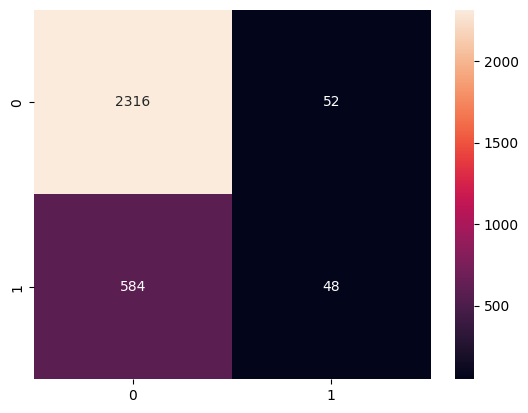

In [14]:
print(confusion_matrix(y_test, predictions))

sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')

In [15]:
roc_auc_score(y, model.predict_proba(X.values)[:, 1])

c:\Users\stsaa\Desktop\Deep-Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6825598215013955

We can see that the model is uneven and very biased towards the majority Churn state so we will balance the data set to be more even 

**Balancing Dataset**

In [16]:
#checking total values of each category
print(df['churn'].value_counts())

churn
0    7963
1    2037
Name: count, dtype: int64


In [17]:
#ChatGPT was used for assisstence with balancing Dataset
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

X = df.drop('churn', axis=1)
y = df['churn']

smote = SMOTE(sampling_strategy=0.5, random_state=42)  
X_res, y_res = smote.fit_resample(X, y)




**Train/Test Split with new balanced dataset**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42,
stratify=y_res
)


**Scalling**

In [19]:
from sklearn.preprocessing import StandardScaler
from joblib import dump

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

dump(sc, "scaler.joblib")

['scaler.joblib']

**Logistic Regression**

In [20]:

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


**Metrics**

In [21]:
#making test predictions 
predictions = model.predict(X_test)

# printing the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# getting overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80      2389
           1       0.60      0.75      0.67      1195

    accuracy                           0.75      3584
   macro avg       0.73      0.75      0.74      3584
weighted avg       0.77      0.75      0.76      3584


Model overall accuracy: 75.25%


The metrics show 75 percent accuracy which is not very good but its balanced event though model is performing slight poorly on minority target category

[[1800  589]
 [ 298  897]]


<Axes: >

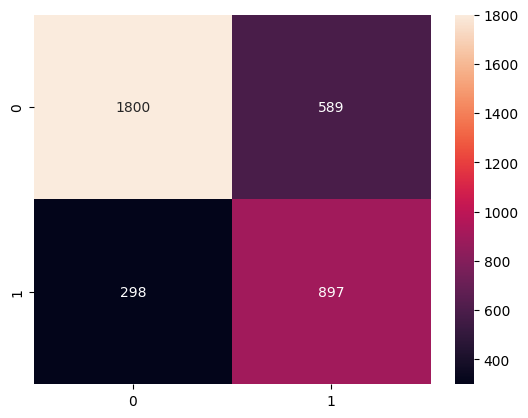

In [22]:
print(confusion_matrix(y_test, predictions))

sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g')

In [23]:
#We will check AUC score againsnt the new balanced dataset
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])


0.8203113643249832

ROC AUC score of 0.82 shows that its performing good 

**Correlation Matrix**

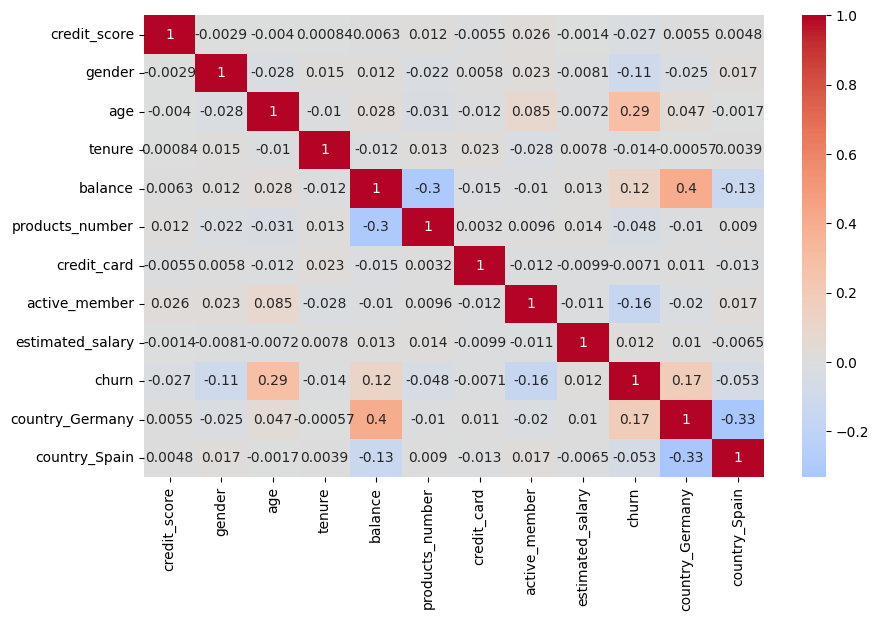

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.show()


In [25]:
df.tail()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1,0
9999,792,0,28,4,130142.79,1,1,0,38190.78,0,0,0


In [26]:
# Gender -column: 0 => Female, 1 => Male
tester_row = {
    'credit_score': 771,
    'gender': 1,
    'age': 39,
    'tenure': 5,
    'balance': 0.0,
    'products_number': 2,
    'credit_card': 1,
    'active_member': 0,
    'estimated_salary': 96270.64,
    'country_Germany':0,
    'country_Spain':0

}

# creating a pandas DataFrame and scale the values
tester_row = pd.DataFrame([tester_row])
tester_row = sc.transform(tester_row)

print("All probabilities by category:")
print(model.predict_proba(tester_row))
print()

# change these based on your original data
labels = ["No", "Yes"]

print("Did this person churn (No/Yes):")
result = labels[model.predict(tester_row)[0]]
print(result)
print("-------------------")

All probabilities by category:
[[0.71068432 0.28931568]]

Did this person churn (No/Yes):
No
-------------------
